# 1D Lax Tube

[![DownloadNotebook](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/r2.5.0/resource/_static/logo_notebook_en.svg)](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/notebook/r2.5.0/mindflow/en/cfd_solver/mindspore_lax_tube.ipynb)&emsp;[![DownloadCode](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/r2.5.0/resource/_static/logo_download_code_en.svg)](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/notebook/r2.5.0/mindflow/en/cfd_solver/mindspore_lax_tube.py)&emsp;[![View Source On Gitee](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/r2.5.0/resource/_static/logo_source_en.svg)](https://gitee.com/mindspore/docs/blob/r2.5.0/docs/mindflow/docs/source_en/cfd_solver/lax_tube.ipynb)

This notebook requires **MindSpore version >= 2.0.0** to support new APIs including: *mindspore.jit, mindspore.jit_class*.

The shock tube problem is a common test for the accuracy of computational fluid codes, like Riemann solvers. The test consists of a one-dimensional Riemann problem, i.e., the development of an ideal gas under different conditions at the left and right ends.

## Problem Description

The definition of the Lax tube problem is:

$$
\frac{\partial}{\partial t} \left(\begin{matrix} \rho \\ \rho u \\ E \\\end{matrix} \right) + \frac{\partial}{\partial x} \left(\begin{matrix} \rho u \\ \rho u^2 + p \\ u(E + p) \\\end{matrix} \right) = 0
$$

$$
E = \frac{\rho}{\gamma - 1} + \frac{1}{2}\rho u^2
$$

where $\gamma = 1.4$ for ideal gas. The initial condition is:

$$
\left(\begin{matrix} \rho \\ u \\ p \\\end{matrix}\right)_{x<0.5} = \left(\begin{matrix} 0.445 \\ 0.698 \\ 3.528 \\\end{matrix}\right), \quad
\left(\begin{matrix} \rho \\ u \\ p \\\end{matrix}\right)_{x>0.5} = \left(\begin{matrix} 0.5 \\ 0.0 \\ 0.571 \\\end{matrix}\right)
$$

The Neumann boundary condition is applied on both side of the tube.

The following `src` pacakage can be downloaded in [src](https://gitee.com/mindspore/mindscience/tree/r0.7/MindFlow/applications/cfd/lax/src).

In [1]:
import mindspore as ms
from mindflow import load_yaml_config, vis_1d
from mindflow import cfd
from mindflow.cfd.runtime import RunTime
from mindflow.cfd.simulator import Simulator

from src.ic import lax_ic_1d

ms.set_context(device_target="GPU", device_id=3)

## Defining Simulator and RunTime

The mesh, material, runtime, boundary conditions and numerical methods are defined in [numeric.yaml](https://gitee.com/mindspore/mindscience/blob/r0.7/MindFlow/applications/cfd/lax/numeric.yaml).

In [2]:
config = load_yaml_config('numeric.yaml')
simulator = Simulator(config)
runtime = RunTime(config['runtime'], simulator.mesh_info, simulator.material)

## Initial Condition

Initial condition is determined according to mesh coordinates.

In [3]:
mesh_x, _, _ = simulator.mesh_info.mesh_xyz()
pri_var = lax_ic_1d(mesh_x)
con_var = cfd.cal_con_var(pri_var, simulator.material)

## Running Simulation

Run CFD simulation with time marching.

In [4]:
while runtime.time_loop(pri_var):
    pri_var = cfd.cal_pri_var(con_var, simulator.material)
    runtime.compute_timestep(pri_var)
    con_var = simulator.integration_step(con_var, runtime.timestep)
    runtime.advance()

current time = 0.000000, time step = 0.001117
current time = 0.001117, time step = 0.001107
current time = 0.002224, time step = 0.001072
current time = 0.003296, time step = 0.001035
current time = 0.004332, time step = 0.001016
current time = 0.005348, time step = 0.001008
current time = 0.006356, time step = 0.000991
current time = 0.007347, time step = 0.000976
current time = 0.008324, time step = 0.000966
current time = 0.009290, time step = 0.000960
current time = 0.010250, time step = 0.000957
current time = 0.011207, time step = 0.000954
current time = 0.012161, time step = 0.000953
current time = 0.013113, time step = 0.000952
current time = 0.014066, time step = 0.000952
current time = 0.015017, time step = 0.000951
current time = 0.015969, time step = 0.000951
current time = 0.016920, time step = 0.000952
current time = 0.017872, time step = 0.000951
current time = 0.018823, time step = 0.000951
current time = 0.019775, time step = 0.000952
current time = 0.020726, time step

## Post Processing

You can view the density, pressure and velocity.

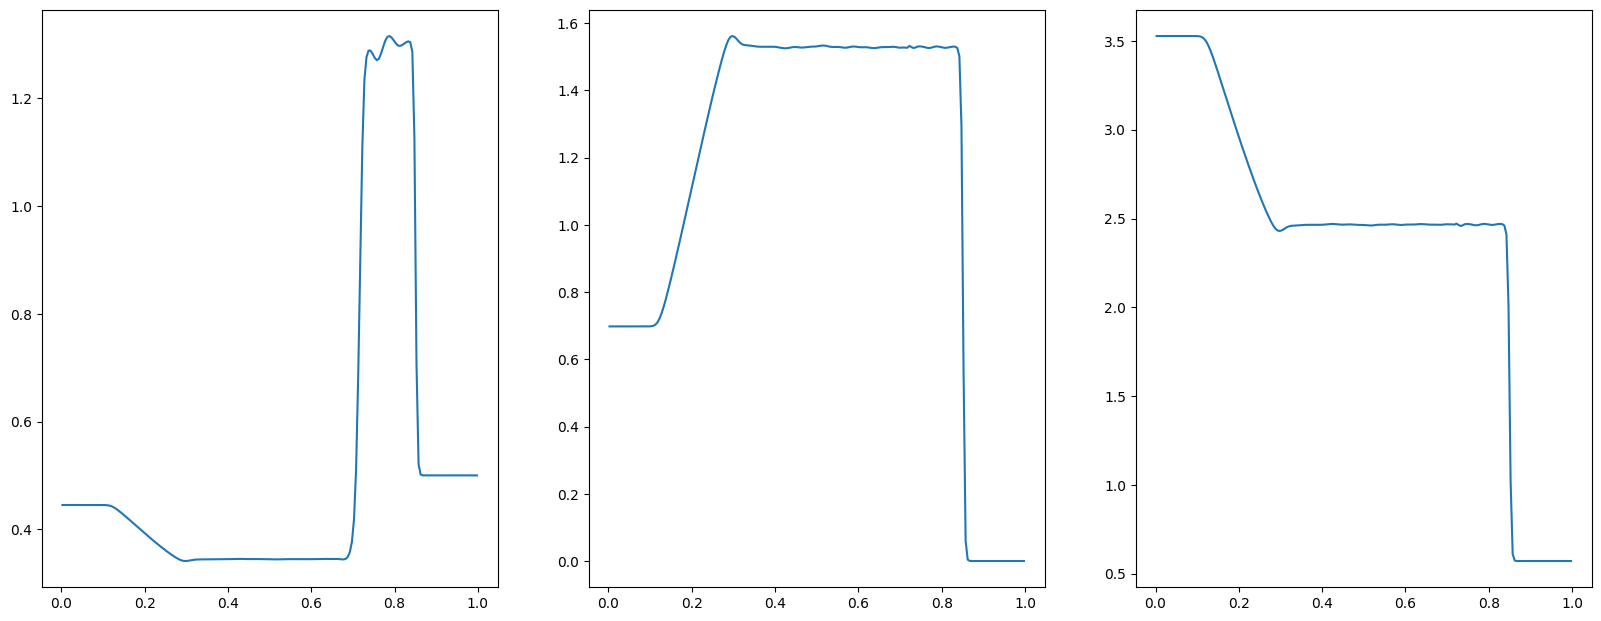

In [5]:
pri_var = cfd.cal_pri_var(con_var, simulator.material)
vis_1d(pri_var, 'lax.jpg')